In [17]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft 

In [18]:
def wavenum(i, N) : return (i + N // 2) % N - N // 2

In [19]:
# Direct convolution between 
def d_conv(M, W, X):
    return (X * W) + M

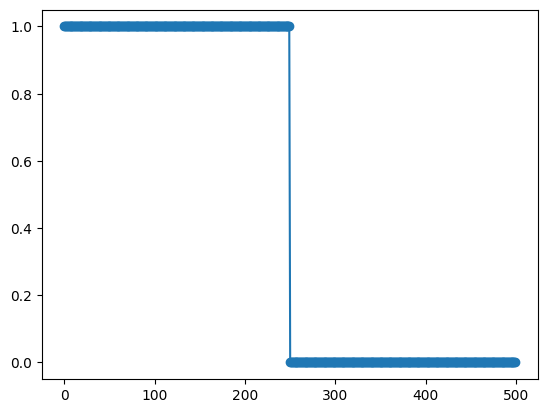

In [20]:
n = 500
x = np.arange(n)
x0 = n * 0.5
X = x < x0
X = np.array(X)
plt.plot(x,X, marker ='o')

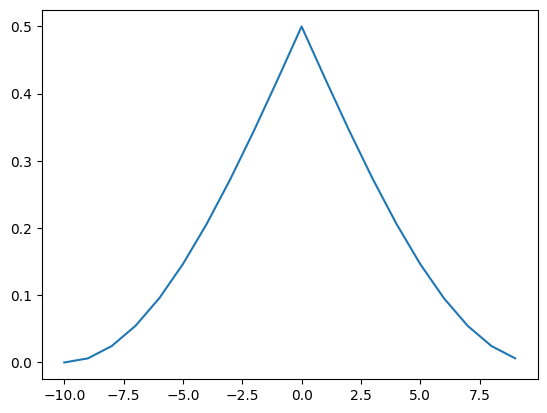

In [21]:
# Create filter.
M = 20
y = np.arange(M)
H = 1/2 - 1/2* np.cos((wavenum(y,M)*np.pi)/M)
H = np.array(H)
plt.plot(np.arange(M) - M/2,H)

In [22]:
# fractional shift
delta = 100.1
G= np.exp(-2j * wavenum(x, n) / n * np.pi * delta)
if n & 1:
    idx0, idx1 = n//2, 1 + n//2
    #ambiguous = np.exp(-2j * (n - 1) / n * np.pi * delta)
    # print("wavenums", wavenum(idx0), wavenum(idx1))
    # print("H:", H[idx0], H[idx1])
else :
    idx0 = n//2
    ambiguous = np.exp(-2j * (n//2) / n * np.pi * delta)
    # print("H:", H[idx0], ambiguous)
    G[idx0] = 0.5 * (ambiguous + 1/ambiguous)
    # print("new H:", H[idx0])

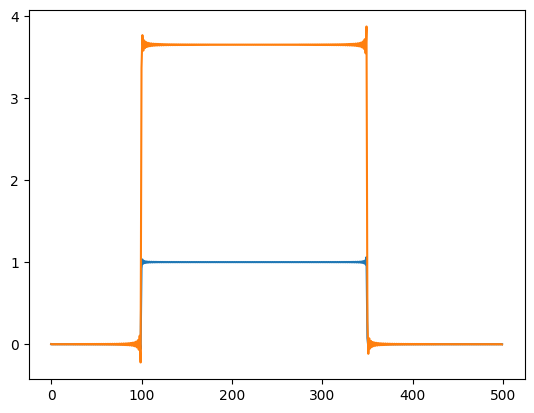

In [23]:
# Apply filter to each point of y
x_shifted = np.fft.ifft(np.fft.fft(X) * G)
x_shifted_filter = np.zeros(n, dtype=complex)

for i in range(n):
    A = 0
    for j in range(M):
        A += x_shifted[i] * H[j]
    x_shifted_filter[i] = A 

# x_shifted_filter /= M
plt.plot(x,x_shifted)
plt.plot(x,x_shifted_filter)